# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import KNNImputer
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Data Collection

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Data Understanding

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')
#pd.reset_option('display.max_colwidth')

### Analyzing train data

In [4]:
df_train.shape

(1460, 81)

In [5]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [6]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Identifying features with null values in 'df_train' dataset.

In [7]:
df_train_n = df_train.isnull().sum()
df_train_null = df_train_n[df_train_n > 0]
df_train_null_summary = pd.DataFrame({
    'Column Name': df_train_null.index,
    'Type': df_train.dtypes[df_train_null.index].values,
    'Number of Null Values': df_train_null.values
})
df_train_null_summary.sort_values(by='Number of Null Values', ascending=False)

,Column Name,Type,Number of Null Values
16,PoolQC,object,1453
18,MiscFeature,object,1406
1,Alley,object,1369
17,Fence,object,1179
2,MasVnrType,object,872
10,FireplaceQu,object,690
0,LotFrontage,float64,259
11,GarageType,object,81
12,GarageYrBlt,float64,81
13,GarageFinish,object,81


### Analyzing train data

In [8]:
df_test.shape

(1459, 80)

In [9]:
df_test.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
Heating           object


In [10]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


Identifying features with null values in each 'df_test' dataset.

In [11]:
df_test_n = df_test.isnull().sum()
df_test_null = df_test_n[df_test_n > 0]
df_test_null_summary = pd.DataFrame({
    'Column Name': df_test_null.index,
    'Type': df_test.dtypes[df_test_null.index].values,
    'Number of Null Values': df_test_null.values
})
df_test_null_summary.sort_values(by='Number of Null Values', ascending=False)

,Column Name,Type,Number of Null Values
29,PoolQC,object,1456
31,MiscFeature,object,1408
2,Alley,object,1352
30,Fence,object,1169
6,MasVnrType,object,894
21,FireplaceQu,object,730
1,LotFrontage,float64,227
28,GarageCond,object,78
23,GarageYrBlt,float64,78
27,GarageQual,object,78


# Data Wrangling

### Not selected features for treating null values

##### 'PoolQC' and 'PoolArea' 

The reason these features were not used to fill null values or selected for ML development is because of the large number of null values present in both datasets. Specifically, the feature 'PoolQC' has 99.52% null values in 'df_train' and 99.79% null values in 'df_test'. Since the feature 'PoolQC' is closely related to 'PoolArea', both were excluded.

Below is a graphic representing this.

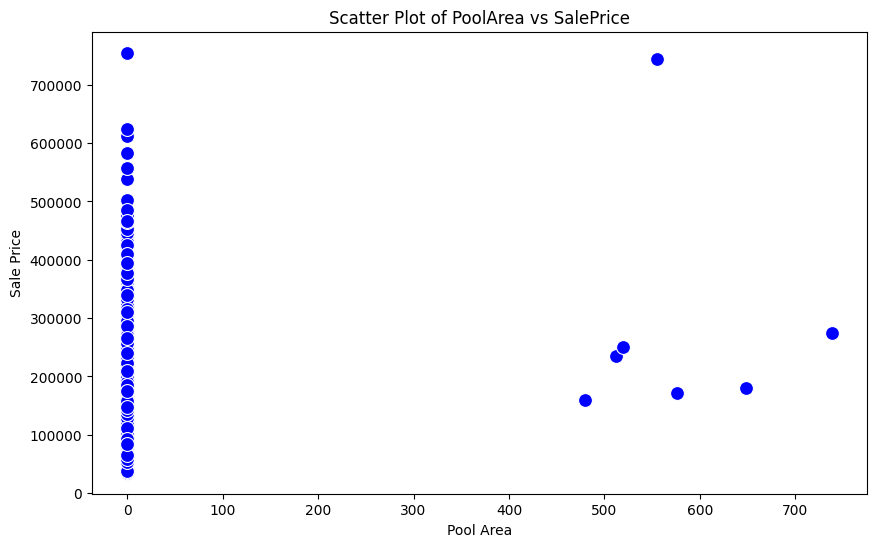

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PoolArea', y='SalePrice', data=df_train, color='blue', s=100)

plt.title('Scatter Plot of PoolArea vs SalePrice')
plt.xlabel('Pool Area')
plt.ylabel('Sale Price')

plt.show()

### Selected features for treating null values

#### 'MiscFeature'

In [13]:
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('No misc feature')
df_test['MiscFeature'] = df_test['MiscFeature'].fillna('No misc feature')

#### 'Alley'

In [14]:
df_train['Alley'] = df_train['Alley'].fillna('No alley access')
df_test['Alley'] = df_test['Alley'].fillna('No alley access')

#### 'Fence'

In [15]:
df_train['Fence'] = df_train['Fence'].fillna('No fence')
df_test['Fence'] = df_test['Fence'].fillna('No fence')

#### 'MasVnrType'

A question was raised about whether there are any values that are null in the feature 'MasVnrType' but have a value in 'MasVnrArea', which represents inconsistency

In [16]:
# For 'df_train'
# Filter rows where 'MasVnrType' is null
df_missing_masvnr_type = df_train[df_train['MasVnrType'].isna()]

# Check if 'MasVnrArea' is null or 0 for these rows
masvnr_area_check = df_missing_masvnr_type['MasVnrArea'].isna() | (df_missing_masvnr_type['MasVnrArea'] == 0.0)

# Check if all conditions are met
all_conform = masvnr_area_check.all()

if all_conform:
    print("All records where 'MasVnrType' is null have 'MasVnrArea' as 0 or null.")
else:
    print("Not all records where 'MasVnrType' is null have 'MasVnrArea' as 0 or null.")

# Get records that do not conform to the condition
non_conforming_records = df_missing_masvnr_type[~masvnr_area_check]
non_conforming_records

Not all records where 'MasVnrType' is null have 'MasVnrArea' as 0 or null.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
624,625,60,RL,80.0,10400,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,6,5,1972,1972,Gable,CompShg,VinylSd,VinylSd,NaN,288.0,TA,TA,CBlock,TA,TA,No,Rec,247,Unf,0,485,732,GasA,Gd,Y,SBrkr,1012,778,0,1790,1,0,1,2,4,1,TA,8,Min2,1,TA,Attchd,1972.0,RFn,2,484,TA,TA,Y,148,0,0,0,147,0,NaN,No fence,No misc feature,0,11,2006,WD,Normal,165150
773,774,20,RL,70.0,10150,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,NaN,No fence,No misc feature,0,7,2007,COD,Normal,114500
1230,1231,90,RL,NaN,18890,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,No fence,Gar2,8300,8,2007,WD,Normal,190000
1300,1301,60,RL,NaN,10762,Pave,No alley access,IR1,Lvl,AllPub,CulDSac,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,NaN,344.0,Gd,TA,PConc,Gd,TA,No,GLQ,694,Unf,0,284,978,GasA,Ex,Y,SBrkr,1005,978,0,1983,0,0,2,1,3,1,Gd,9,Typ,1,TA,Attchd,1999.0,Fin,2,490,TA,TA,Y,0,0,0,0,0,0,NaN,No fence,No misc feature,0,5,2009,WD,Normal,225000
1334,1335,160,RM,24.0,2368,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,5,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,NaN,312.0,TA,TA,CBlock,TA,TA,No,LwQ,765,Unf,0,0,765,GasA,TA,Y,SBrkr,765,600,0,1365,0,0,1,1,3,1,TA,7,Min1,0,NaN,Attchd,1970.0,Unf,2,440,TA,TA,Y,0,36,0,0,0,0,NaN,No fence,No misc feature,0,5,2009,WD,Normal,125000


In [17]:
# For 'df_train'
df_filtered = df_train[(df_train['MasVnrArea'] >= 288) & (df_train['MasVnrArea'] <= 344)]
# Mode from the lowest values of 'MasVnrAre' (11, 14, 16) is BrkFace, the same as the identified above.
#df_filtered2 = df_train[(df_train['MasVnrArea'] == 1.0)]
masvnr_type_mode = df_filtered['MasVnrType'].mode()

if not masvnr_type_mode.empty:
    moda_value = masvnr_type_mode[0]
    
    df_train.loc[(df_train['MasVnrType'].isna()) & 
                 (df_train['MasVnrArea'] >= 288) & 
                 (df_train['MasVnrArea'] <= 344), 
                 'MasVnrType'] = moda_value
    
    df_train.loc[(df_train['MasVnrArea'] == 1.0) & 
                 (df_train['MasVnrType'].isna()), 
                 'MasVnrType'] = moda_value

In [18]:
# For 'df_test'
# Filter rows where 'MasVnrType' is null
df_missing_masvnr_type = df_test[df_test['MasVnrType'].isna()]

# Check if 'MasVnrArea' is null or 0 for these rows
masvnr_area_check = df_missing_masvnr_type['MasVnrArea'].isna() | (df_missing_masvnr_type['MasVnrArea'] == 0.0)

# Check if all conditions are met
all_conform = masvnr_area_check.all()

if all_conform:
    print("All records where 'MasVnrType' is null have 'MasVnrArea' as 0 or null.")
else:
    print("Not all records where 'MasVnrType' is null have 'MasVnrArea' as 0 or null.")

# Get records that do not conform to the condition
non_conforming_records = df_missing_masvnr_type[~masvnr_area_check]
non_conforming_records

Not all records where 'MasVnrType' is null have 'MasVnrArea' as 0 or null.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
209,1670,20,RL,102.0,13514,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,NaN,285.0,Ex,TA,PConc,Ex,TA,No,GLQ,1142.0,Unf,0.0,632.0,1774.0,GasA,Ex,Y,SBrkr,1808,0,0,1808,1.0,0.0,2,0,3,1,Ex,7,Typ,1,Gd,Attchd,2008.0,Fin,3.0,850.0,TA,TA,Y,200,26,0,0,0,0,NaN,No fence,No misc feature,0,3,2009,WD,Normal
992,2453,20,RM,52.0,8626,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,6,1956,1956,Gable,CompShg,MetalSd,MetalSd,NaN,1.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,968,0,0,968,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1956.0,Unf,1.0,331.0,Fa,TA,Y,0,0,0,0,0,0,NaN,No fence,No misc feature,0,5,2007,WD,Normal
1150,2611,20,RL,124.0,27697,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,4,3,1961,1961,Shed,CompShg,Plywood,Plywood,NaN,198.0,TA,TA,CBlock,TA,TA,No,BLQ,811.0,Unf,0.0,585.0,1396.0,GasA,TA,N,SBrkr,1608,0,0,1608,0.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1961.0,Unf,1.0,444.0,TA,Fa,Y,152,38,0,0,0,0,NaN,No fence,No misc feature,0,11,2007,COD,Abnorml


In [19]:
# For 'df_test'
df_filtered1 = df_test[(df_test['MasVnrArea'] >= 198) & (df_test['MasVnrArea'] <= 285)]
# Mode from the lowest values of 'MasVnrAre' (3, 14, 16) is BrkFace, the same as the identified above.
#df_filtered2 = df_train[(df_train['MasVnrArea'] == 1.0)]
masvnr_type_mode1 = df_filtered1['MasVnrType'].mode()

if not masvnr_type_mode.empty:
    moda_value = masvnr_type_mode[0]
    
    df_test.loc[(df_test['MasVnrType'].isna()) & 
                 (df_test['MasVnrArea'] >= 198) & 
                 (df_test['MasVnrArea'] <= 285), 
                 'MasVnrType'] = moda_value
    
    df_test.loc[(df_test['MasVnrArea'] == 1.0) & 
                 (df_test['MasVnrType'].isna()), 
                 'MasVnrType'] = moda_value

In [20]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('No Masonry veneer type')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('No Masonry veneer type')

#### 'MasVnrArea'

In [21]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0.0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(0.0)

#### 'FireplaceQu'

In [22]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('No fireplace')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('No fireplace')

#### 'LotFrontage'

In [23]:
# Creating a KNN imputer using selected variables
imputer = KNNImputer(n_neighbors=5)

# Selecting variables for imputation, including 'LotFrontage'
features = ['LotFrontage', 'LotArea', 'OverallQual', 'GrLivArea', 'YearBuilt']

# Applying the imputer
df_train_imputed = pd.DataFrame(imputer.fit_transform(df_train[features]), columns=features)
df_test_imputed = pd.DataFrame(imputer.transform(df_test[features]), columns=features)

# Creating a flag indicating whether the value was imputed
df_train['LotFrontage_Imputed_Flag'] = df_train['LotFrontage'].isnull().astype(int)
df_test['LotFrontage_Imputed_Flag'] = df_test['LotFrontage'].isnull().astype(int)

# Replacing only the null values in the original column
df_train['LotFrontage'] = df_train.apply(lambda row: df_train_imputed.loc[row.name, 'LotFrontage'] if pd.isnull(row['LotFrontage']) else row['LotFrontage'], axis=1)
df_test['LotFrontage'] = df_test.apply(lambda row: df_test_imputed.loc[row.name, 'LotFrontage'] if pd.isnull(row['LotFrontage']) else row['LotFrontage'], axis=1)

### 'Garage's': 
#### 'GarageType_Filled', 'GarageYrBlt',  'GarageFinish_Filled', 'GarageQual_Filled', 'GarageCond_Filled'

In [24]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(-1)
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(-1)

# Defining labels and bins
bins = [-1, 1900, 1940, 1960, 1980, 2000, 2010, 2025]
labels = ['Null', '1900-1940', '1941-1960', '1961-1980', '1981-2000', '2001-2010', '2011+']

# Creating the bin column for df_train
df_train['GarageYrBlt_Bin'] = pd.cut(df_train['GarageYrBlt'], bins=bins, labels=labels, right=False)
df_train['GarageYrBlt_Bin'] = df_train['GarageYrBlt_Bin'].astype(object)

# Creating the bin column for df_test
df_test['GarageYrBlt_Bin'] = pd.cut(df_test['GarageYrBlt'], bins=bins, labels=labels, right=False)
df_test['GarageYrBlt_Bin'] = df_test['GarageYrBlt_Bin'].astype(object)

In [25]:
df_train['GarageType'] = df_train['GarageType'].fillna('No garage type')
df_test['GarageType'] = df_test['GarageType'].fillna('No garage type')

df_train['GarageFinish'] = df_train['GarageFinish'].fillna('No garage finish')
df_test['GarageFinish'] = df_test['GarageFinish'].fillna('No garage finish')

df_train['GarageQual'] = df_train['GarageQual'].fillna('No garage quality')
df_test['GarageQual'] = df_test['GarageQual'].fillna('No garage quality')

df_train['GarageCond'] = df_train['GarageCond'].fillna('No garage condition')
df_test['GarageCond'] = df_test['GarageCond'].fillna('No garage condition')

### 'Bsmt's':
#### 'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtCond', 'BsmtQual'

In [26]:
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna('No Basement')
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna('No Basement')

df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('No Basement')
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna('No Basement')

df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('No Basement')
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('No Basement')

df_train['BsmtCond'] = df_train['BsmtCond'].fillna('No Basement')
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('No Basement')

df_train['BsmtQual'] = df_train['BsmtQual'].fillna('No Basement')
df_test['BsmtQual'] = df_test['BsmtQual'].fillna('No Basement')

#### 'Electrical'

In [27]:
mode_value = df_train['Electrical'].mode()[0]

df_train['Electrical'] = df_train['Electrical'].fillna(mode_value)

#### 'MSZoning'

In [28]:
mode_value = df_test['MSZoning'].mode()[0]

df_test['MSZoning'] = df_test['MSZoning'].fillna(mode_value)

#### 'BsmtFullBath' and 'BsmtHalfBath'

In [29]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0)

#### 'Functional'

In [30]:
mode_value = df_test['Functional'].mode()[0]

df_test['Functional'] = df_test['Functional'].fillna(mode_value)

#### 'Utilities'

In [31]:
mode_value = df_test['Utilities'].mode()[0]

df_test['Utilities'] = df_test['Utilities'].fillna(mode_value)

#### 'GarageCars' and 'GarageArea'

In [32]:
df_test['GarageCars'] = df_test['GarageCars'].fillna(0)
df_test['GarageArea'] = df_test['GarageArea'].fillna(0)

#### 'TotalBsmtSF', 'BsmtUnfSF', 'BsmtFinSF2', and 'BsmtFinSF1'

In [33]:
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)

df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0)

df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(0)

df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)

#### 'KitchenQual'

In [34]:
mode_value = df_test['KitchenQual'].mode()[0]

df_test['KitchenQual'] = df_test['KitchenQual'].fillna(mode_value)

#### 'Exterior1st', and 'Exterior2nd'

In [35]:
mode_value_1 = df_test['Exterior1st'].mode()[0]
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(mode_value)

mode_value_2 = df_test['Exterior2nd'].mode()[0]
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(mode_value)

#### 'SaleType'

In [36]:
mode_value = df_test['SaleType'].mode()[0]

df_test['SaleType'] = df_test['SaleType'].fillna(mode_value)

A dataframe to store all features that is object type and has no null value on it.

In [37]:
# Check columns with 0 null values
df_train_n = df_train.isnull().sum()
df_train_null = df_train_n[df_train_n == 0]

# Filter only the columns of type 'object'
df_train_null_object = df_train_null.index[df_train.dtypes[df_train_null.index] == 'object']

# Create a summary of these columns
df_train_null_summary = pd.DataFrame({
    'Column Name': df_train_null_object,
    'Type': df_train.dtypes[df_train_null_object].values,
    'Number of Null Values': df_train_n[df_train_null_object].values
})

# Sort by the number of null values
df_train_null_summary.sort_values(by='Number of Null Values', ascending=False)

,Column Name,Type,Number of Null Values
0,MSZoning,object,0
32,FireplaceQu,object,0
24,BsmtFinType1,object,0
25,BsmtFinType2,object,0
26,Heating,object,0
27,HeatingQC,object,0
28,CentralAir,object,0
29,Electrical,object,0
30,KitchenQual,object,0
31,Functional,object,0


In [38]:
# A list of object features with non-null values that will be One-Hot-Encoded
new_columns_to_encode = df_train_null_summary['Column Name'].tolist()

### One-Hot Encoding

In [39]:
# One-Hot Encoding for non-numeric features
def encode_columns(df_train, df_test, columns_to_encode):
    
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    
    for column in columns_to_encode:
        
        encoder.fit(df_train[[column]])
        encoded_train = encoder.transform(df_train[[column]])
        encoded_test = encoder.transform(df_test[[column]])
        
        encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out([column]))
        encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out([column]))
        
        encoded_train_df.index = df_train.index
        encoded_test_df.index = df_test.index
        
        df_train = df_train.join(encoded_train_df)
        df_test = df_test.join(encoded_test_df)
    
    return df_train, df_test

columns_to_encode = new_columns_to_encode

df_train, df_test = encode_columns(df_train, df_test, columns_to_encode)

# Exploratory Data Analisys

## Pearson correlation

A numerical representation of the linear correlation between all numeric features in 'df_train', including those that are One-Hot Encoded.

In [40]:
numerical_attributes = df_train.select_dtypes(include='number')
correlation_matrix = numerical_attributes.corrwith(df_train['SalePrice'])
sorted_correlation = correlation_matrix.sort_values(ascending=False)

In [41]:
sorted_correlation

SalePrice                            1.000000
OverallQual                          0.790982
GrLivArea                            0.708624
GarageCars                           0.640409
GarageArea                           0.623431
TotalBsmtSF                          0.613581
1stFlrSF                             0.605852
FullBath                             0.560664
BsmtQual_Ex                          0.553105
TotRmsAbvGrd                         0.533723
YearBuilt                            0.522897
YearRemodAdd                         0.507101
KitchenQual_Ex                       0.504094
Foundation_PConc                     0.497734
MasVnrArea                           0.472614
Fireplaces                           0.466929
ExterQual_Gd                         0.452466
ExterQual_Ex                         0.451164
GarageYrBlt_Bin_2001-2010            0.443127
BsmtFinType1_GLQ                     0.434597
HeatingQC_Ex                         0.434543
GarageFinish_Fin                  

## Eta²

Also a numerical representation, Eta² quantifies the strength of the association between a categorical variable and a continuous variable, not just linear correlation.

In [42]:
def eta_squared(categorical, numerical):
    # Get unique categories from the categorical variable, excluding null values
    categories = categorical.dropna().unique()
    
    # Calculate the overall mean of the numerical variable
    overall_mean = np.mean(numerical)
    
    # Calculate the sum of squares within groups (SSW)
    ssw = np.sum([
        len(numerical[categorical == cat]) * (np.mean(numerical[categorical == cat]) - overall_mean) ** 2 
        for cat in categories
    ])
    
    # Calculate the total sum of squares (SST)
    sst = np.sum((numerical - overall_mean) ** 2)
    
    # Return the proportion of explained variance (Eta²)
    return ssw / sst

target = 'SalePrice'

# Select all columns in the DataFrame that are of type 'object' (categorical variables)
categorical_cols = df_train.select_dtypes(include=['object']).columns

# Create a dictionary to store the Eta² results
eta_squared_results = {}

# Iterate over each categorical column and calculate Eta² in relation to the target variable
for col in categorical_cols:
    eta_squared_value = eta_squared(df_train[col], df_train[target])
    eta_squared_results[col] = eta_squared_value

# Create a DataFrame with the Eta² results
eta_squared_df = pd.DataFrame(list(eta_squared_results.items()), columns=['Feature', 'Eta_squared'])

# Sort the DataFrame by Eta² values in descending order
eta_squared_df = eta_squared_df.sort_values(by='Eta_squared', ascending=False)

In [43]:
eta_squared_df

,Feature,Eta_squared
8,Neighborhood,0.545575
18,ExterQual,0.477388
21,BsmtQual,0.464994
30,KitchenQual,0.456599
34,GarageFinish,0.305874
43,GarageYrBlt_Bin,0.305588
32,FireplaceQu,0.293961
20,Foundation,0.256368
33,GarageType,0.249204
24,BsmtFinType1,0.210810


## Graph Visualization

#### 'Alley'

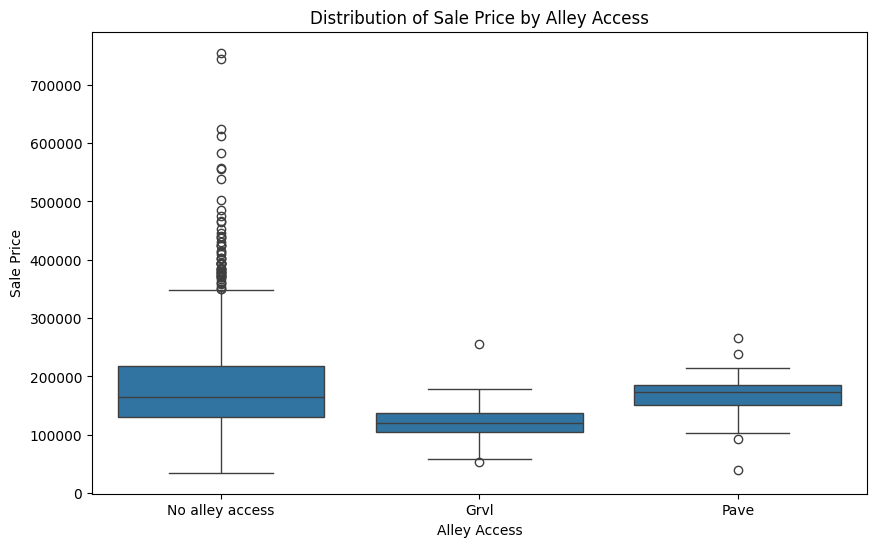

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alley', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by Alley Access')
plt.xlabel('Alley Access')
plt.ylabel('Sale Price')
plt.show()

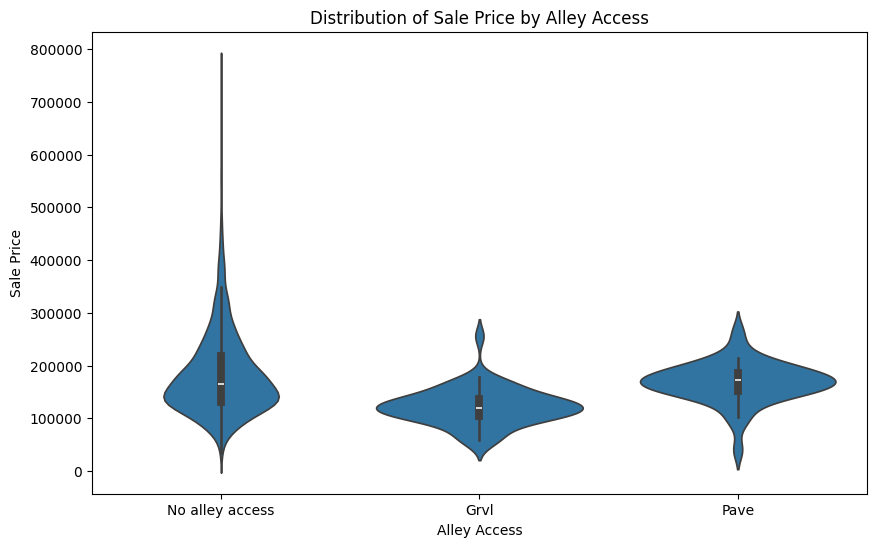

In [45]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Alley', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by Alley Access')
plt.xlabel('Alley Access')
plt.ylabel('Sale Price')
plt.show()

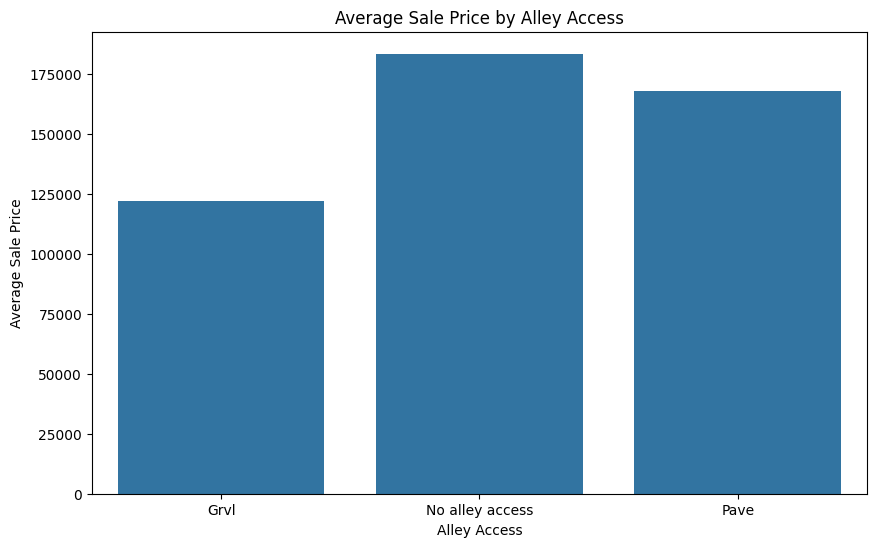

In [46]:
mean_prices = df_train.groupby('Alley')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Alley', y='SalePrice', data=mean_prices)
plt.title('Average Sale Price by Alley Access')
plt.xlabel('Alley Access')
plt.ylabel('Average Sale Price')
plt.show()

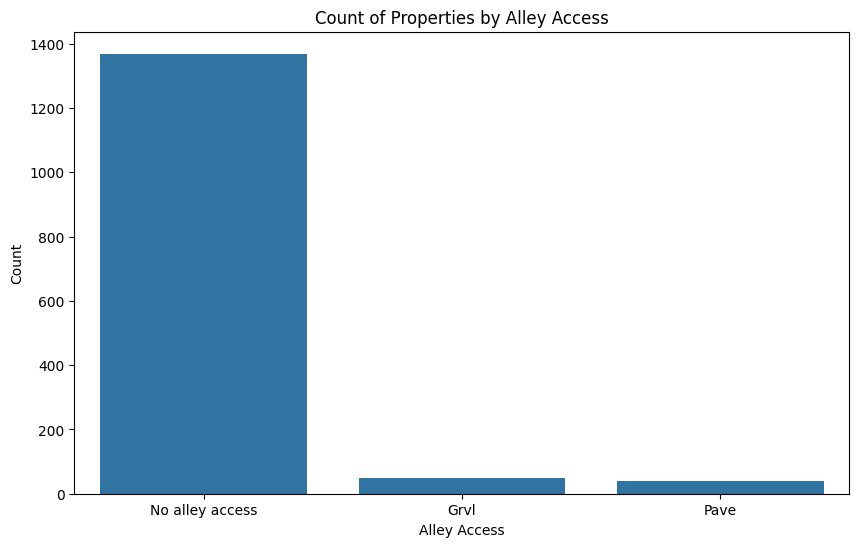

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Alley', data=df_train)
plt.title('Count of Properties by Alley Access')
plt.xlabel('Alley Access')
plt.ylabel('Count')
plt.show()

#### 'Fence'

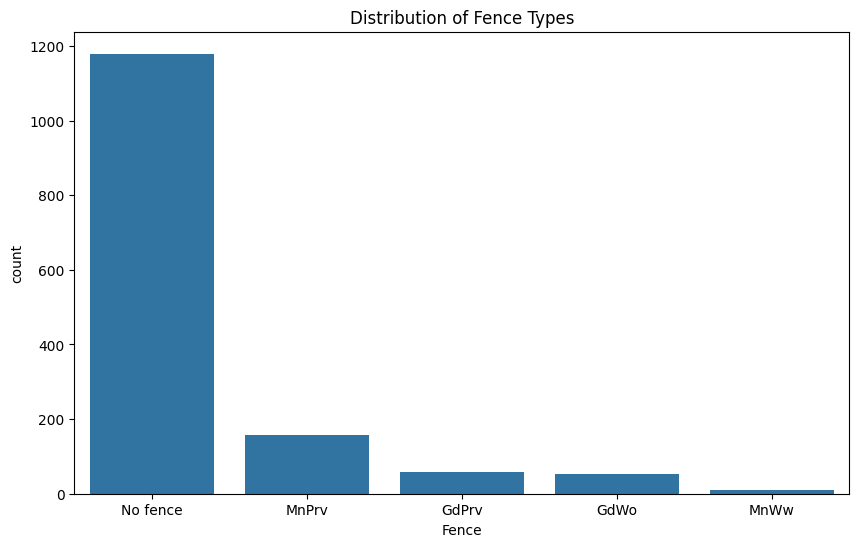

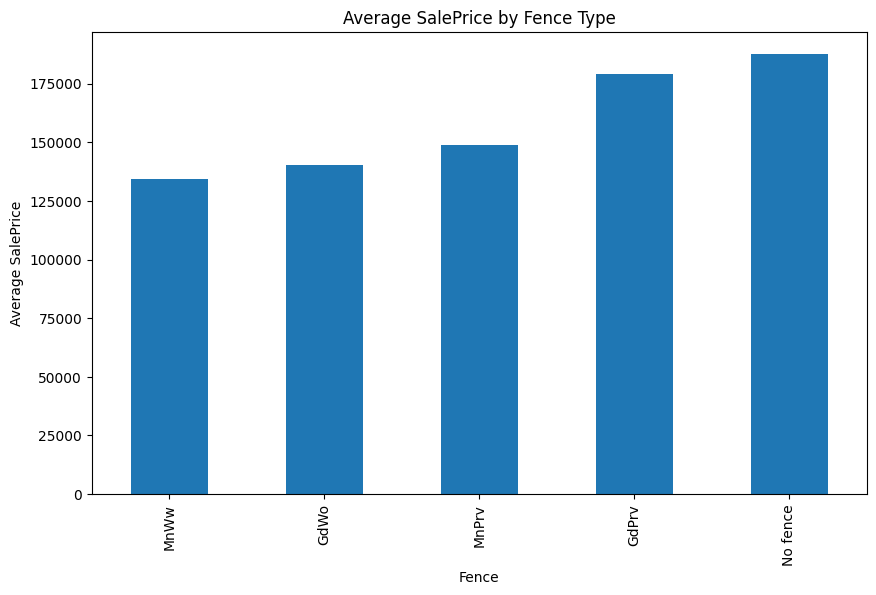

In [48]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='Fence', order=df_train['Fence'].value_counts().index)
plt.title('Distribution of Fence Types')
plt.show()

plt.figure(figsize=(10, 6))
avg_price_by_fence = df_train.groupby('Fence')['SalePrice'].mean().sort_values()
avg_price_by_fence.plot(kind='bar')
plt.title('Average SalePrice by Fence Type')
plt.ylabel('Average SalePrice')
plt.show()

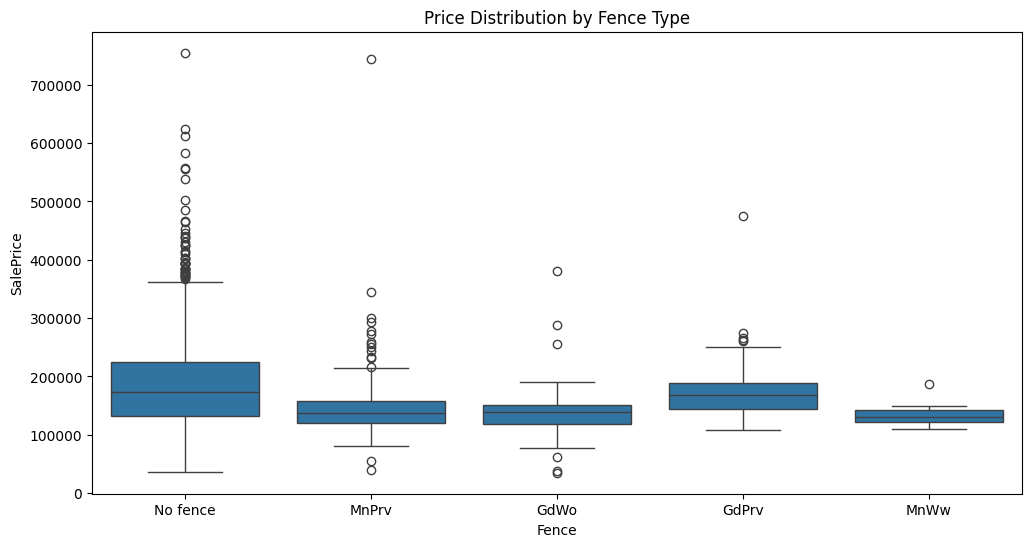

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Fence', y='SalePrice', data=df_train)
plt.title('Price Distribution by Fence Type')
plt.show()

#### 'MasVnrType'

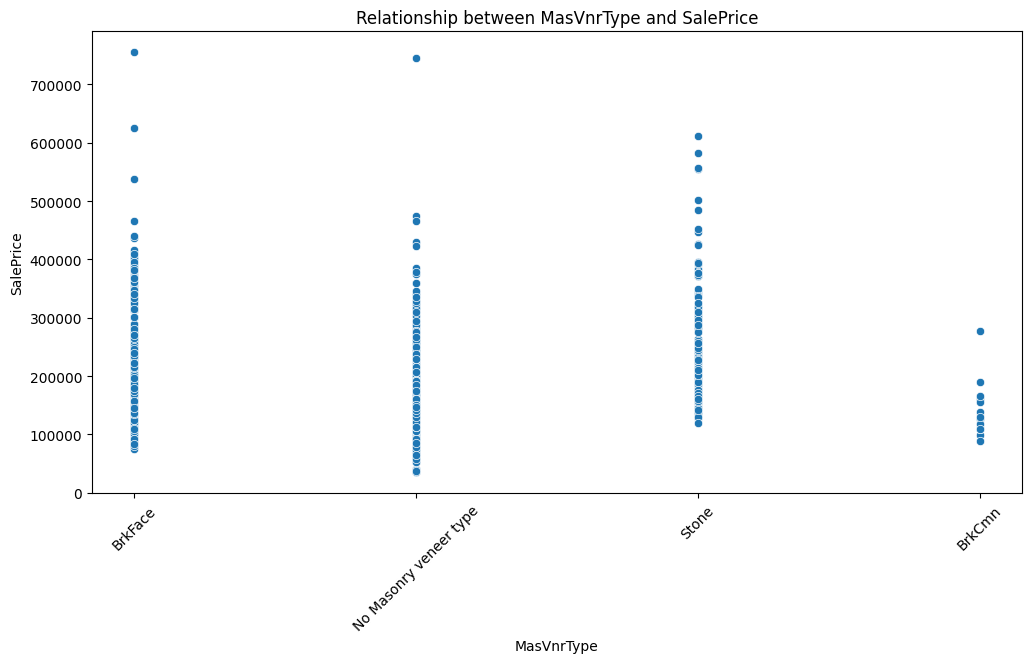

In [50]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='MasVnrType', y='SalePrice', data=df_train)
plt.title('Relationship between MasVnrType and SalePrice')
plt.xlabel('MasVnrType')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

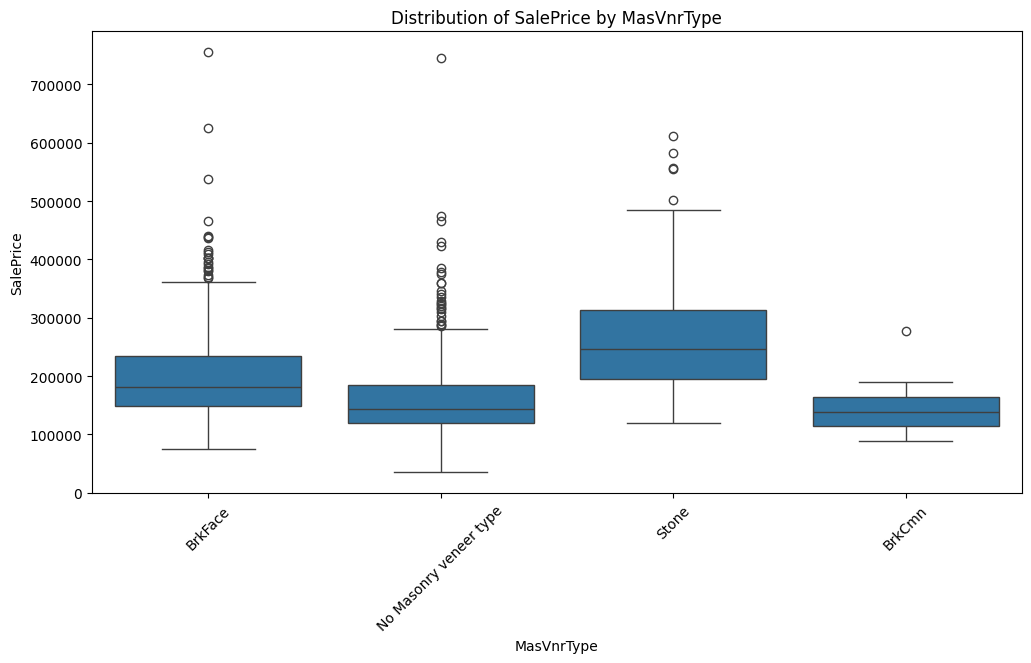

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MasVnrType', y='SalePrice', data=df_train)
plt.title('Distribution of SalePrice by MasVnrType')
plt.xlabel('MasVnrType')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()

#### 'FireplaceQu'

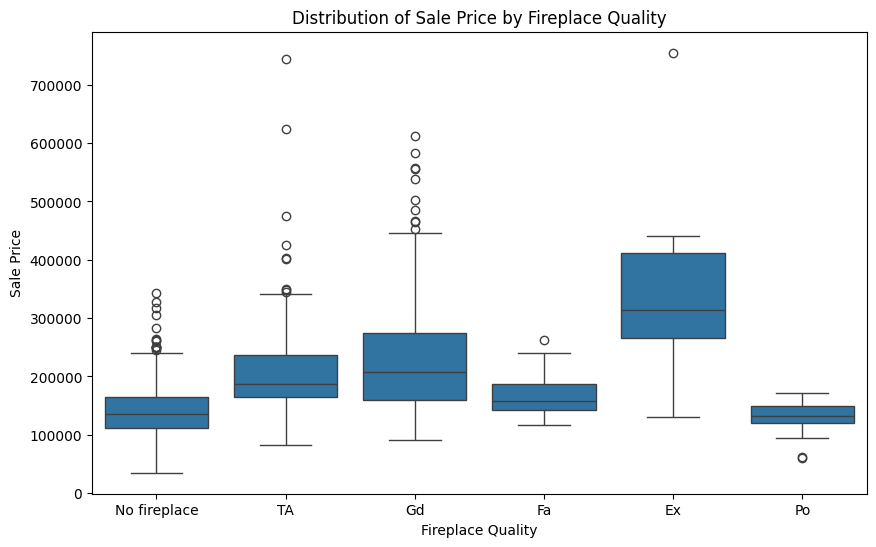

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='FireplaceQu', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by Fireplace Quality')
plt.xlabel('Fireplace Quality')
plt.ylabel('Sale Price')
plt.show()

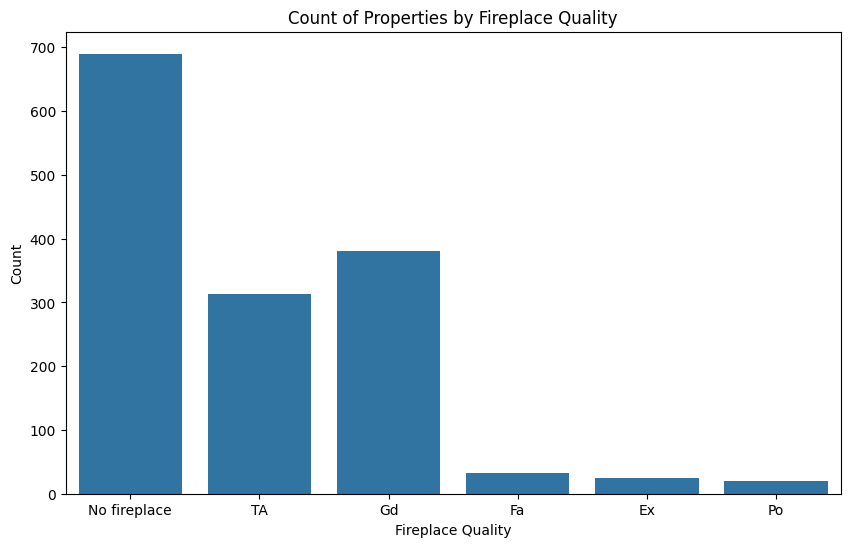

In [53]:
plt.figure(figsize=(10, 6))
sns.countplot(x='FireplaceQu', data=df_train)
plt.title('Count of Properties by Fireplace Quality')
plt.xlabel('Fireplace Quality')
plt.ylabel('Count')
plt.show()

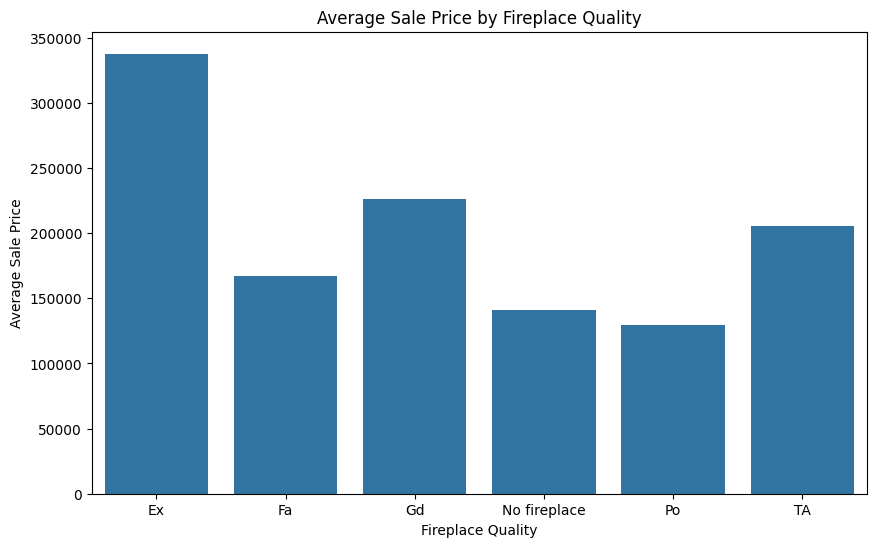

In [54]:
mean_prices = df_train.groupby('FireplaceQu')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='FireplaceQu', y='SalePrice', data=mean_prices)
plt.title('Average Sale Price by Fireplace Quality')
plt.xlabel('Fireplace Quality')
plt.ylabel('Average Sale Price')
plt.show()

#### 'LotFrontage'

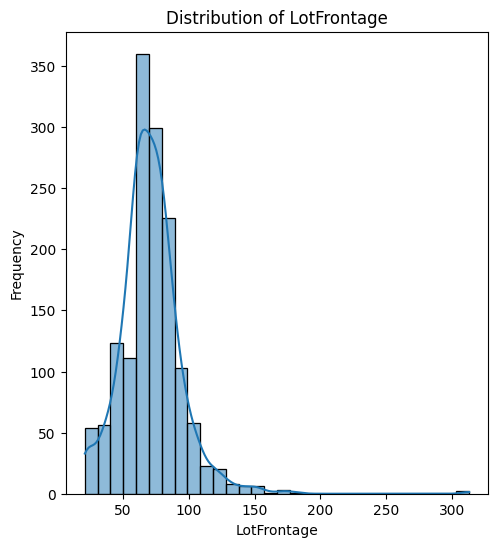

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_train['LotFrontage'], kde=True, bins=30)
plt.title('Distribution of LotFrontage')
plt.xlabel('LotFrontage')
plt.ylabel('Frequency')
plt.show()

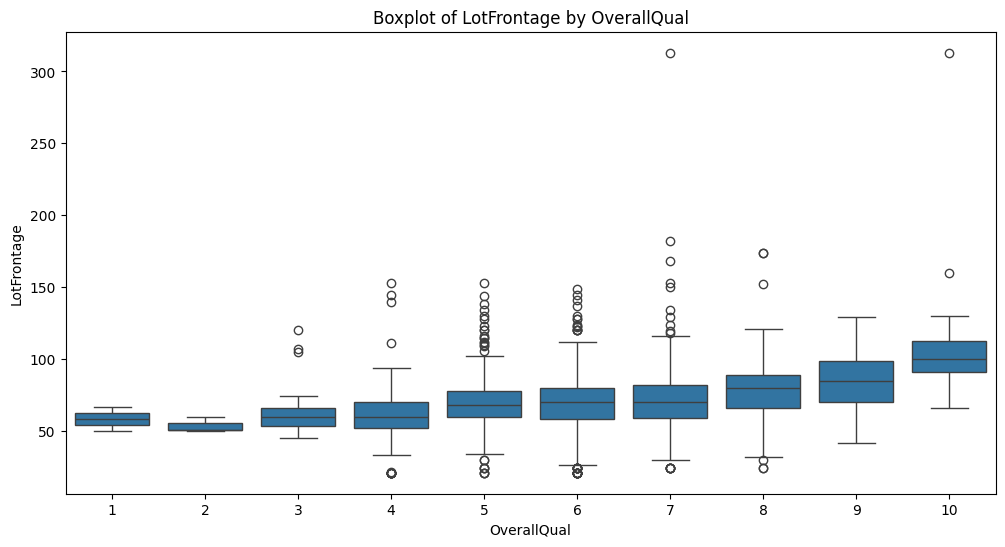

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='OverallQual', y='LotFrontage', data=df_train)
plt.title('Boxplot of LotFrontage by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('LotFrontage')
plt.show()

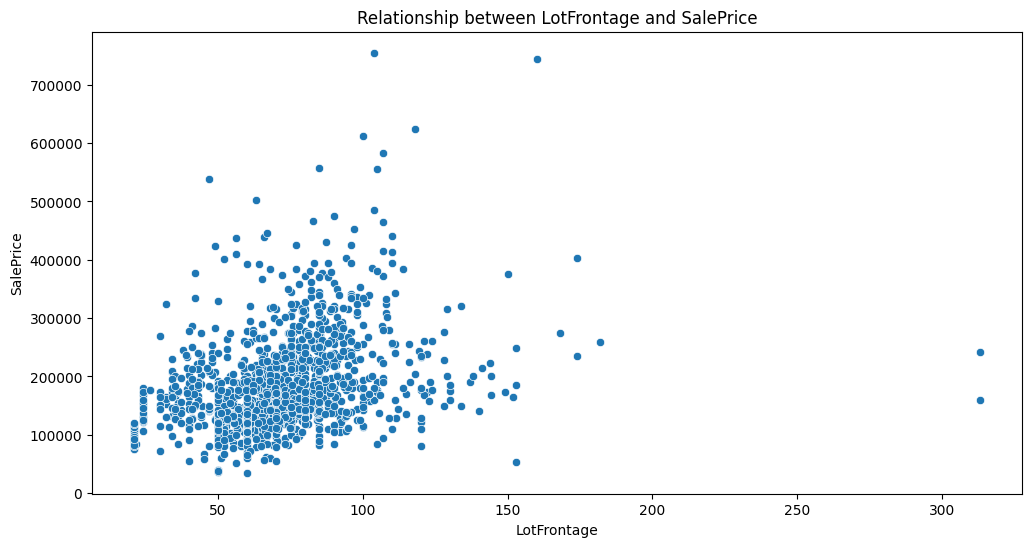

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df_train)
plt.title('Relationship between LotFrontage and SalePrice')
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')
plt.show()

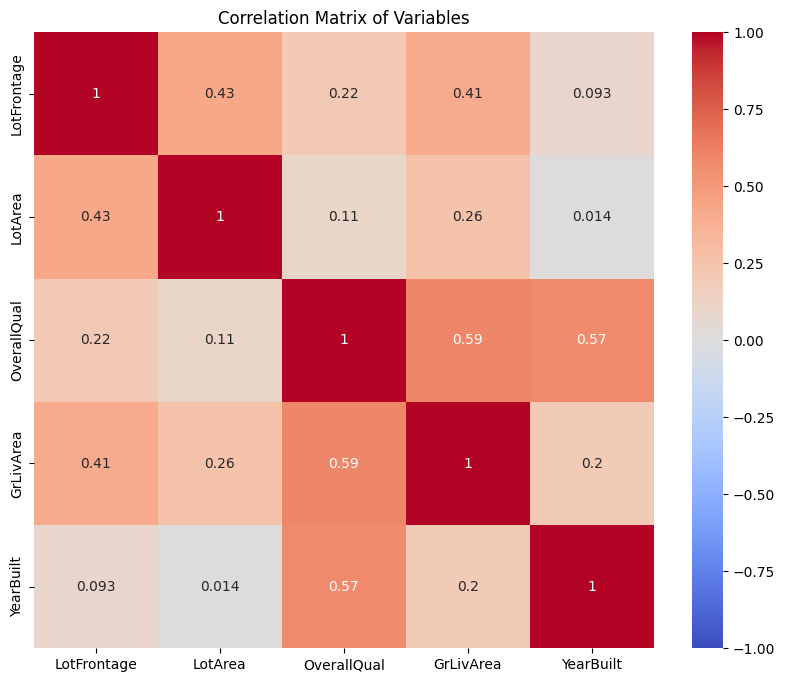

In [58]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_train[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Variables')
plt.show()

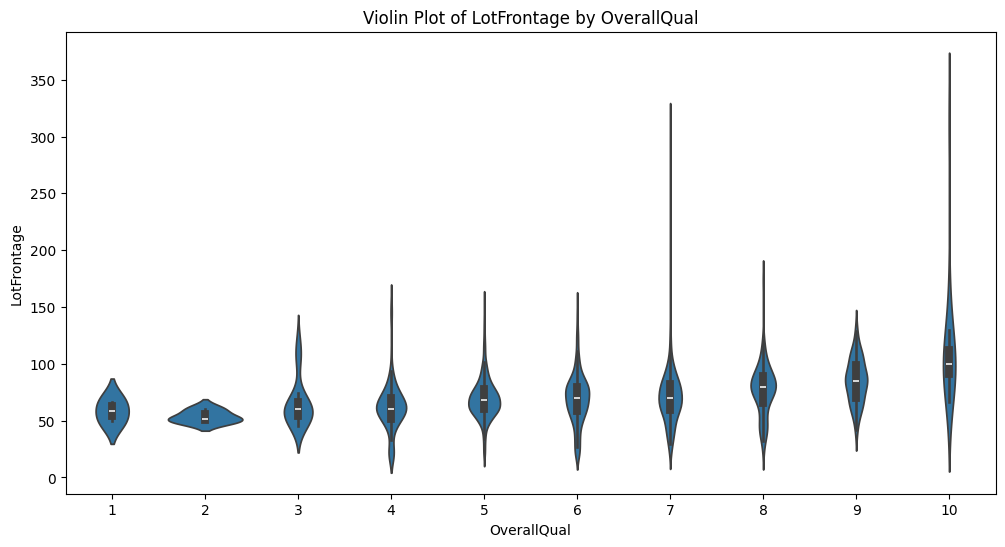

In [59]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='OverallQual', y='LotFrontage', data=df_train)
plt.title('Violin Plot of LotFrontage by OverallQual')
plt.xlabel('OverallQual')
plt.ylabel('LotFrontage')
plt.show()

#### 'Neighborhood'

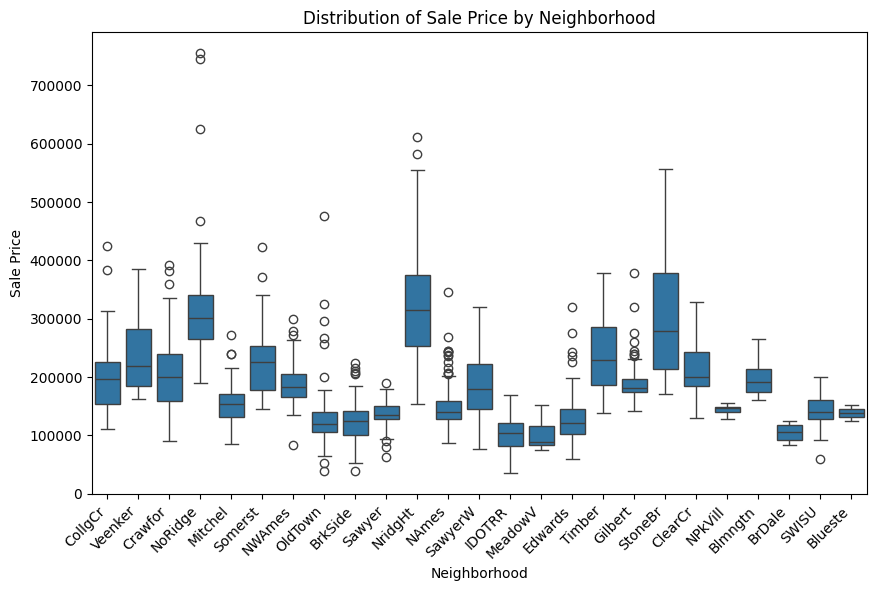

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

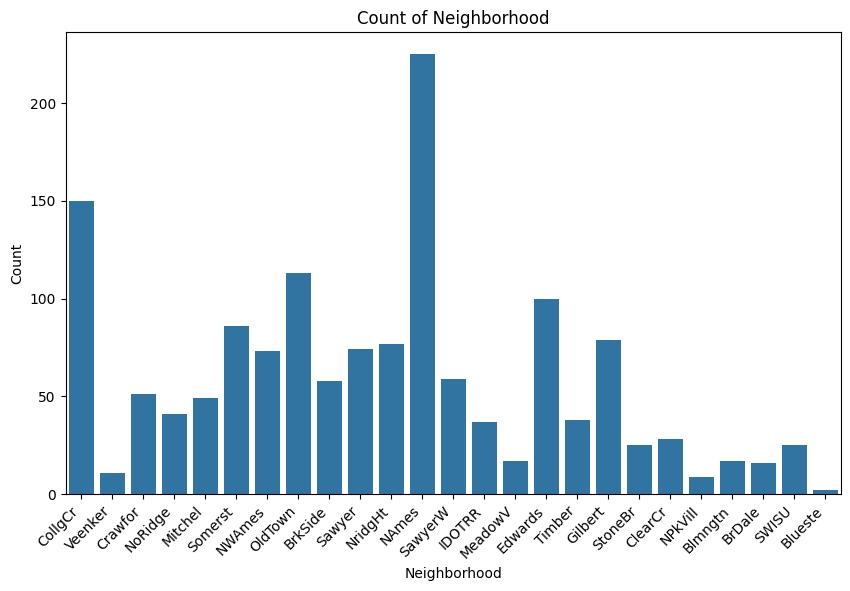

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Neighborhood', data=df_train)
plt.title('Count of Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 'ExterQual'

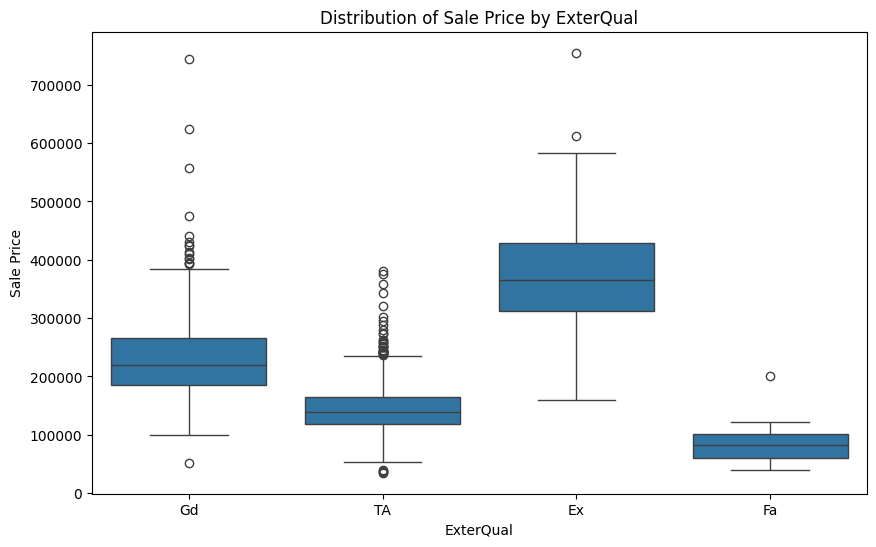

In [62]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='ExterQual', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('Sale Price')
plt.show()

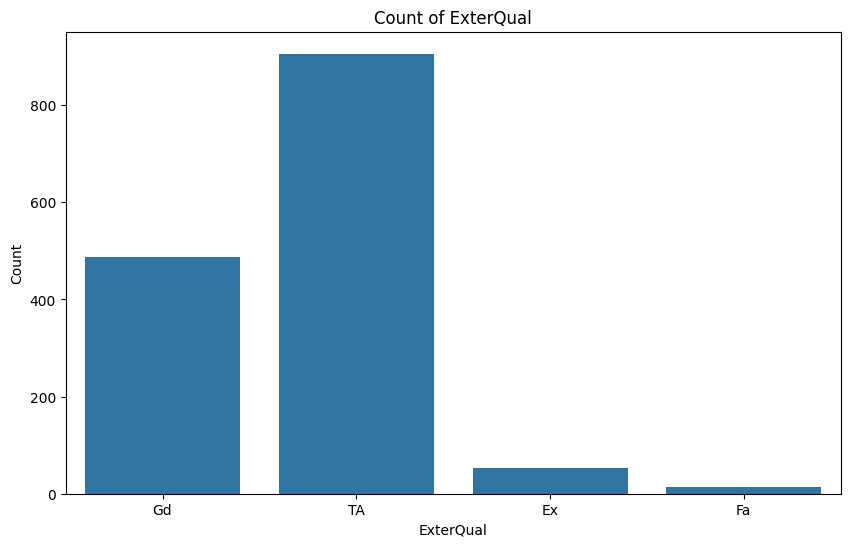

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ExterQual', data=df_train)
plt.title('Count of ExterQual')
plt.xlabel('ExterQual')
plt.ylabel('Count')
plt.show()

#### 'BsmtQual'

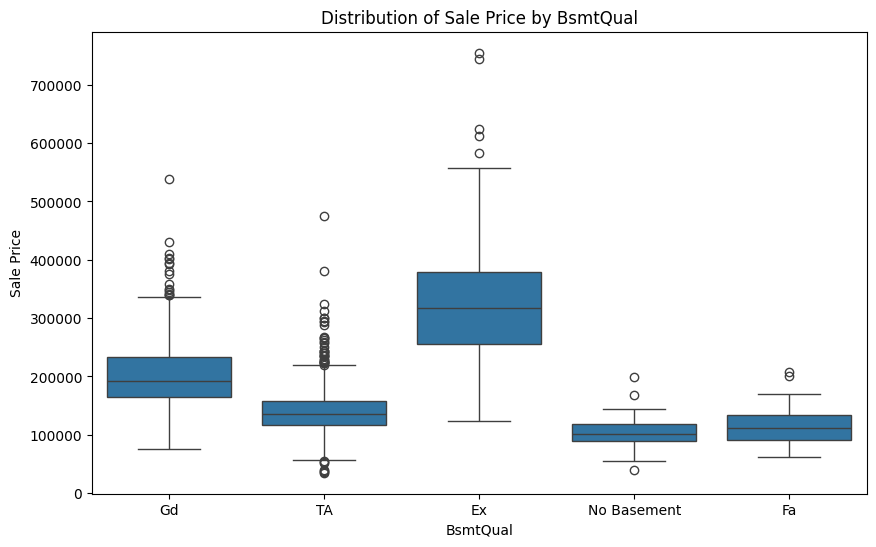

In [64]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='BsmtQual', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by BsmtQual')
plt.xlabel('BsmtQual')
plt.ylabel('Sale Price')
plt.show()

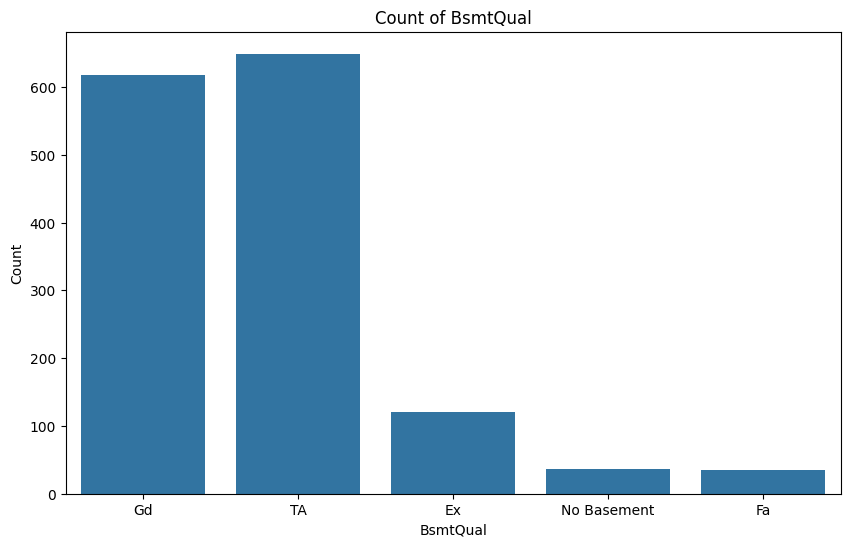

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BsmtQual', data=df_train)
plt.title('Count of BsmtQual')
plt.xlabel('BsmtQual')
plt.ylabel('Count')
plt.show()

#### 'KitchenQual'

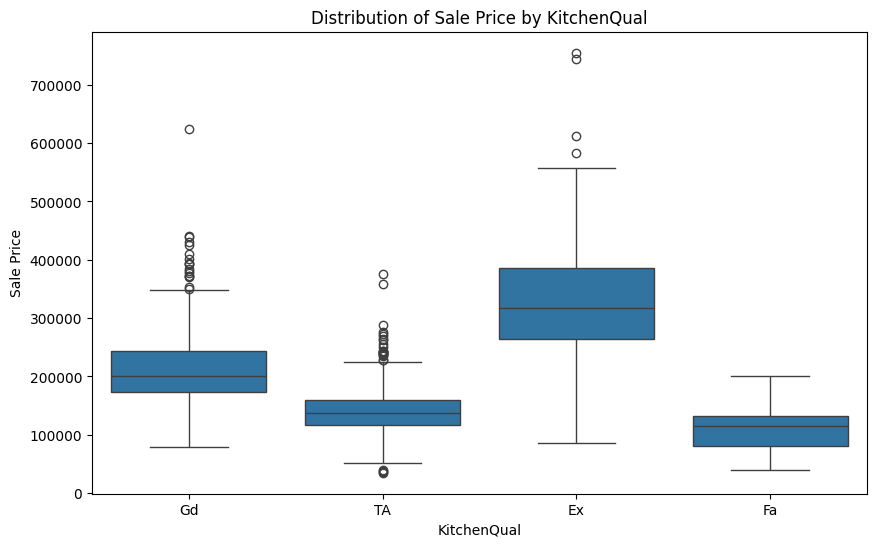

In [66]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by KitchenQual')
plt.xlabel('KitchenQual')
plt.ylabel('Sale Price')
plt.show()

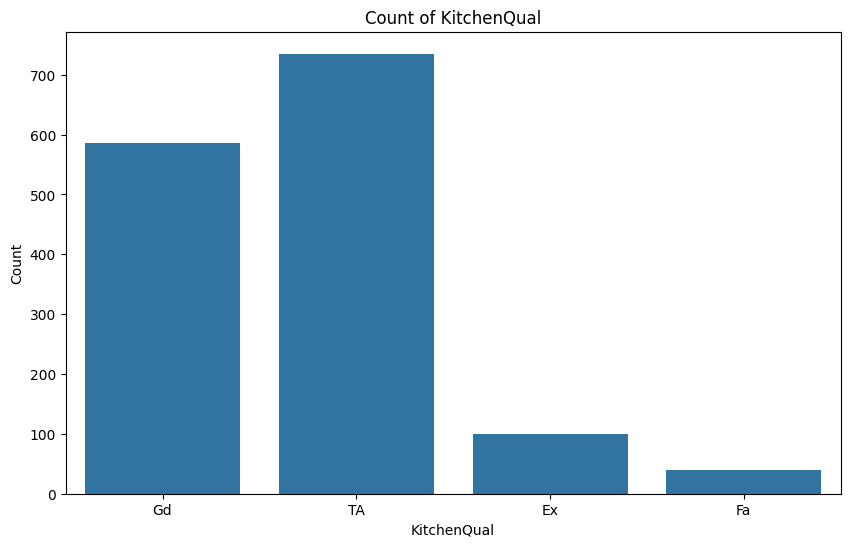

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(x='KitchenQual', data=df_train)
plt.title('Count of KitchenQual')
plt.xlabel('KitchenQual')
plt.ylabel('Count')
plt.show()

#### 'GarageFinish'

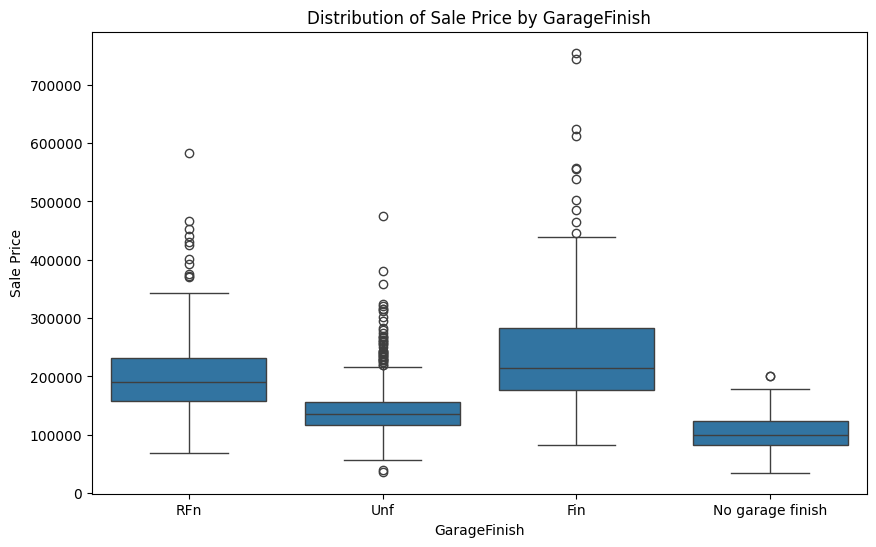

In [68]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageFinish', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by GarageFinish')
plt.xlabel('GarageFinish')
plt.ylabel('Sale Price')
plt.show()

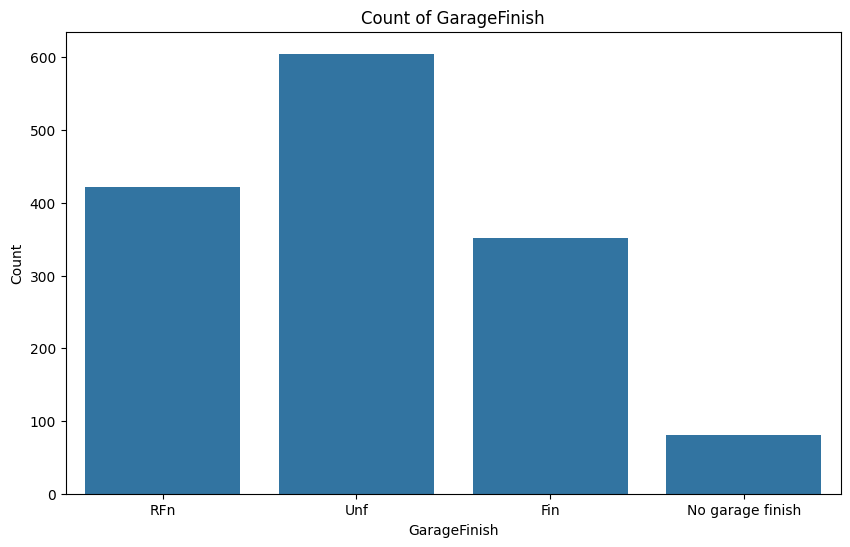

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GarageFinish', data=df_train)
plt.title('Count of GarageFinish')
plt.xlabel('GarageFinish')
plt.ylabel('Count')
plt.show()

#### 'GarageYrBlt_Bin'

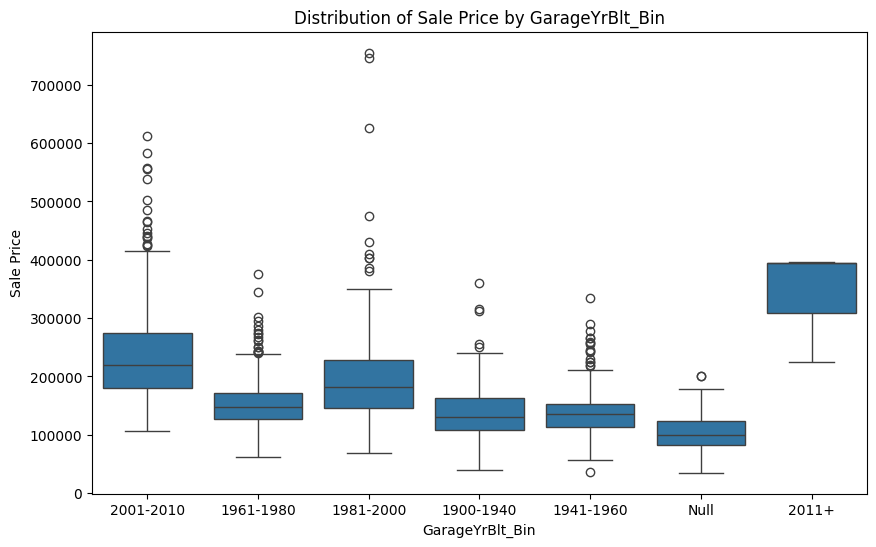

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='GarageYrBlt_Bin', y='SalePrice', data=df_train)
plt.title('Distribution of Sale Price by GarageYrBlt_Bin')
plt.xlabel('GarageYrBlt_Bin')
plt.ylabel('Sale Price')
plt.show()

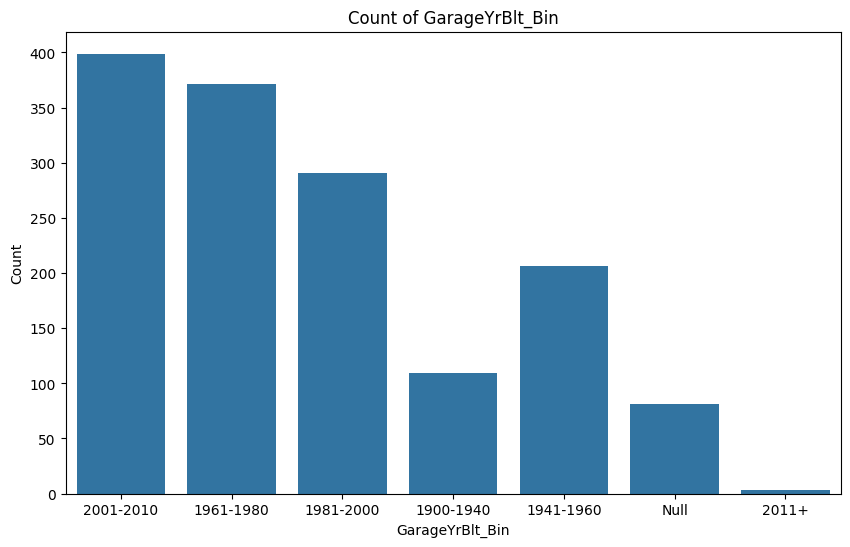

In [71]:
plt.figure(figsize=(10, 6))
sns.countplot(x='GarageYrBlt_Bin', data=df_train)
plt.title('Count of GarageYrBlt_Bin')
plt.xlabel('GarageYrBlt_Bin')
plt.ylabel('Count')
plt.show()

# Model Development

In [72]:
# Setting only numeric features to the model development
numeric_columns_train = df_train.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()
if 'SalePrice' in numeric_columns_train:
    numeric_columns_train.remove('SalePrice')
if 'GarageYrBlt' in numeric_columns_train:
    numeric_columns_train.remove('GarageYrBlt')
if 'PoolArea' in numeric_columns_train:
    numeric_columns_train.remove('PoolArea')
   
numeric_columns_test = df_test.select_dtypes(include=['int32', 'int64', 'float64']).columns.tolist()
if 'GarageYrBlt' in numeric_columns_test:
    numeric_columns_test.remove('GarageYrBlt')
if 'PoolArea' in numeric_columns_test:
    numeric_columns_test.remove('PoolArea')    
    
x_train = df_train[numeric_columns_train]
x_test = df_test[numeric_columns_test]
y_train_log = np.log1p(df_train['SalePrice'])

#### Selected three differents machine learning algorithms to select features to the final model development, throught feature importance method.
#### Those are ElasticNetCV, RandomForestRegressor, and XGBRegressor.

###### ElasticNetCV

In [73]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

elastic_net_cv = ElasticNetCV(alphas=[0.1, 1.0, 10.0], l1_ratio=[0.1, 0.5, 0.9], cv=5, max_iter=2000)
elastic_net_cv.fit(x_train_scaled, y_train_log)

best_elastic_net = elastic_net_cv

feature_importance_elastic_net = best_elastic_net.coef_

feature_names = x_train.columns
importance_df_elastic_net = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_elastic_net
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

###### RandomForestRegressor

In [74]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(x_train_scaled, y_train_log)

feature_importance_rf = rf.feature_importances_

feature_names = x_train.columns

importance_df_random_forest = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_rf
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

###### XGBRegressor

In [75]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

xgboost_model = XGBRegressor(n_estimators=100, random_state=42)

xgboost_model.fit(x_train_scaled, y_train_log)

feature_importance_xgb = xgboost_model.feature_importances_

importance_df_xgboost = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance_xgb
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

In [76]:
# A dataset to store each feature and it's 'feature_importance' value.
df_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'ElasticNet': feature_importance_elastic_net,
    'RandomForest': feature_importance_rf,
    'XGBoost': feature_importance_xgb
})

df_importances = df_importances.set_index('Feature')

### The method used to filter and select the 'feature importance' from each model involves defining percentiles for each list, based on specific characteristics that the model evaluates for 'feature importance'. The objective is to gather the best possible features that will improve the final model's results.

#### Selected percentilesrom each models' 'feature importance'.

###### ElasticNetCV

In [77]:
percentil_79 = importance_df_elastic_net['Importance'].abs().quantile(0.79)

features_importance_elastic = importance_df_elastic_net[
    importance_df_elastic_net['Importance'].abs() > percentil_79
]

###### RandomForestRegressor

In [78]:
percentil_75 = importance_df_random_forest['Importance'].quantile(0.75)

features_importance_random_forest = importance_df_random_forest[importance_df_random_forest['Importance'] >= percentil_75]

###### XGBRegressor

In [79]:
percentile_75 = importance_df_xgboost['Importance'].quantile(0.75)

features_importance_xgboost = importance_df_xgboost[importance_df_xgboost['Importance'] >= percentile_75]

##### Bellow, there are how many features were selected through this method from each machine learning algorithm.

In [80]:
# ElasticNetCV
features_importance_elastic.count()

Feature       64
Importance    64
dtype: int64

In [81]:
# RandomForestRegressor
features_importance_random_forest.count()

Feature       77
Importance    77
dtype: int64

In [82]:
# XGBRegressor
features_importance_xgboost.count()

Feature       77
Importance    77
dtype: int64

### Selecting features

### Two methods were applied to choose the features that represent the most positive impact on the final model development, based on the filtered percentile results of 'feature importance' from these different machine learning algorithms.

#### First Method: intersection of selected feature importance from each model after applying specific percentiles.

In [83]:
features_elastic = features_importance_elastic[['Feature']]
features_rf = features_importance_random_forest[['Feature']]
features_xgboost = features_importance_xgboost[['Feature']]

intersection_features = pd.merge(features_elastic, features_rf, on='Feature')
intersection_features = pd.merge(intersection_features, features_xgboost, on='Feature')

common_features = intersection_features['Feature'].tolist()

In [84]:
common_features.sort()

In [85]:
#number of selected features
len(common_features)

35

#### After analyzing the correlation between all One-Hot-Encoded features and numeric ones, some potentially valuable features were not present in the list of 'common_features', which represents the intersection of feature importance from the three different models mentioned above.

Those variables are presented below with its Pearson correlation value to 'SalePrice'.

- TotRmsAbvGrd                         0.533723
- Foundation_PConc                     0.497734
- MasVnrArea                           0.472614
- ExterQual_Gd                         0.452466
- ExterQual_Ex                         0.451164
- GarageYrBlt_Bin_2001-2010            0.443127
- HeatingQC_Ex                         0.434543
- GarageFinish_Fin                     0.419678
- Neighborhood_NridgHt                 0.402149
- SaleType_New                         0.357509
- SaleCondition_Partial                0.352060

#### After some manual attempts, four new features were added to the list, improving model development. These features are: ('GarageYrBlt_Bin_2001-2010', 'Foundation_PConc', 'GarageFinish_Fin', and 'SaleCondition_Partial').

In [86]:
# Adding those features to the list 'common_features'
common_features.extend([
    'Foundation_PConc',
    'GarageFinish_Fin',
    'GarageYrBlt_Bin_2001-2010',
    'SaleCondition_Partial'
])

In [87]:
common_features.sort()

In [88]:
#number of selected features after adding those 04 (four)
len(common_features)

39

In [89]:
common_features

['1stFlrSF',
 '2ndFlrSF',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinSF1',
 'BsmtFinType1_GLQ',
 'BsmtFullBath',
 'BsmtQual_Ex',
 'CentralAir_N',
 'Condition1_Norm',
 'ExterCond_Fa',
 'ExterQual_TA',
 'Fireplaces',
 'Foundation_PConc',
 'FullBath',
 'Functional_Typ',
 'GarageArea',
 'GarageCars',
 'GarageFinish_Fin',
 'GarageType_Attchd',
 'GarageYrBlt_Bin_2001-2010',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'KitchenQual_Ex',
 'KitchenQual_TA',
 'LotArea',
 'MSZoning_C (all)',
 'MSZoning_RM',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'OverallCond',
 'OverallQual',
 'PavedDrive_N',
 'SaleCondition_Abnorml',
 'SaleCondition_Partial',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd']

#### Second Method: union of selected feature importance from each model after applying specific percentiles.

In [90]:
features_elastic = features_importance_elastic[['Feature']]
features_rf = features_importance_random_forest[['Feature']]
features_xgboost = features_importance_xgboost[['Feature']]

all_features = pd.concat([features_elastic, features_rf, features_xgboost]).drop_duplicates()

union_features = all_features['Feature'].tolist()

In [91]:
union_features.sort()

In [92]:
len(union_features)

114

In [93]:
union_features

['1stFlrSF',
 '2ndFlrSF',
 'Alley_No alley access',
 'BedroomAbvGr',
 'BldgType_1Fam',
 'BldgType_Twnhs',
 'BsmtCond_Fa',
 'BsmtExposure_Gd',
 'BsmtExposure_No',
 'BsmtFinSF1',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Unf',
 'BsmtFinType2_Rec',
 'BsmtFullBath',
 'BsmtQual_Ex',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'BsmtUnfSF',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Norm',
 'Condition1_RRAe',
 'Condition2_PosN',
 'Electrical_FuseF',
 'Electrical_SBrkr',
 'EnclosedPorch',
 'ExterCond_Fa',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior1st_BrkFace',
 'Exterior1st_VinylSd',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Fence_GdWo',
 'Fence_No fence',
 'FireplaceQu_Gd',
 'FireplaceQu_No fireplace',
 'Fireplaces',
 'Foundation_CBlock',
 'Foundation_PConc',
 'FullBath',
 'Functional_Maj2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'GarageArea',
 'GarageCars',
 'GarageCond_TA',
 'GarageFinish_Fin',
 'GarageFinish_RFn',
 'GarageFinish_Un

#### The method chosen for final model development.

The chosen method was the 'First Method.
The reason is that the model performed much better compared to the features obtained from the list of 'union_features' representing the 'Second Method.

#### Setting final features for model fitting based on the 'common_features' list.

In [94]:
x_train_final = df_train[common_features]
x_test_final = df_test[common_features]

# Normalizing the target variable 'SalePrice' using the log1p transformation
y_train_log = np.log1p(df_train['SalePrice'])

### Fitting the model

*Base Models*: Ridge, Lasso, ElasticNet, SVR, GradientBoostingRegressor, XGBRegressor, and CatBoostRegressor

*Meta Model*: XGBRegressor

Since I have already conducted some parameter searching through Randomized Search CV and found the optimal parameters, I will set the model to use them.

In [95]:
# Defining the base models for stacking
base_models = [
    ('ridge', Ridge(alpha=0.5)),
    ('lasso', Lasso(alpha=0.01)),
    ('elasticnet', ElasticNet(alpha=0.05, l1_ratio=0.3)),
    ('svr', SVR(kernel='rbf', C=0.5)),
    ('gboost', GradientBoostingRegressor(learning_rate=0.01, n_estimators=100)),
    ('xgboost', XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)),
    ('catboost', CatBoostRegressor(learning_rate=0.05, depth=7, iterations=100, silent=True))
]

# Defining the meta model for stacking
meta_model = XGBRegressor(learning_rate=0.1, max_depth=3, n_estimators=100)

# Creating the stacking model using the base models and the meta model
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Defining the RMSLE function for scoring
def rmsle(y_true, y_pred):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true)) ** 2))

# Creating a scorer object for RMSLE
rmsle_scorer = make_scorer(rmsle, greater_is_better=False)

# Scaling the features using StandardScaler
scaler = StandardScaler()
x_train_final_scaled = scaler.fit_transform(x_train_final)  # Fitting and transforming the training data
x_test_final_scaled = scaler.transform(x_test_final)  # Transforming the test data

# Adjusting the scaled training and test data to avoid negative values
offset = 1.0 - np.min(x_train_final_scaled)
x_train_final_scaled_adjusted = x_train_final_scaled + offset
x_test_final_scaled_adjusted = x_test_final_scaled + offset

# Applying log1p transformation to the adjusted scaled features
log_transformer = FunctionTransformer(func=np.log1p, validate=True)
x_train_final_scaled_log = log_transformer.fit_transform(x_train_final_scaled_adjusted)
x_test_final_scaled_log = log_transformer.transform(x_test_final_scaled_adjusted)

# Defining the parameter distribution for RandomizedSearchCV
param_dist = {
    'final_estimator__learning_rate': [0.05],
    'final_estimator__max_depth': [3],
    'ridge__alpha': [0.5],
    'lasso__alpha': [0.01],
    'elasticnet__alpha': [0.05],
    'elasticnet__l1_ratio': [0.3],
    'svr__C': [0.5],
    'gboost__learning_rate': [0.01],
    'gboost__n_estimators': [100],
    'xgboost__learning_rate': [0.1],
    'xgboost__max_depth': [3],
    'catboost__learning_rate': [0.05],
    'catboost__depth': [7]
}

# Setting up RandomizedSearchCV with the stacking model and parameter distribution
random_search = RandomizedSearchCV(estimator=stacking_model, param_distributions=param_dist, n_iter=1, cv=5, scoring=rmsle_scorer, n_jobs=-1, random_state=42)

# Fitting the RandomizedSearchCV
random_search.fit(x_train_final_scaled_log, y_train_log)

# Retrieving the best model and parameters from the search
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Retrieving and printing the best RMSLE score
best_score = -random_search.best_score_
print(f"Best RMSLE from cross-validation: {best_score}")
print(f"Best parameters: {best_params}")

Best RMSLE from cross-validation: 0.009322588926425728
Best parameters: {'xgboost__max_depth': 3, 'xgboost__learning_rate': 0.1, 'svr__C': 0.5, 'ridge__alpha': 0.5, 'lasso__alpha': 0.01, 'gboost__n_estimators': 100, 'gboost__learning_rate': 0.01, 'final_estimator__max_depth': 3, 'final_estimator__learning_rate': 0.05, 'elasticnet__l1_ratio': 0.3, 'elasticnet__alpha': 0.05, 'catboost__learning_rate': 0.05, 'catboost__depth': 7}


# Model Evaluation

Based on this ML model, the chosen method for validation was the RMSLE (Root Mean Squared Logarithmic Error, since it is the metric used by Kaggle in this competition. The model's performance is validated through the mean score obtained during training with cross-validation folds.


##### Best RMSLE and parameters from the RandomizedSearchCV.

Best RMSLE from cross-validation: 0.009322588926425728

Best parameters: {'xgboost__max_depth': 3, 'xgboost__learning_rate': 0.1, 'svr__C': 0.5, 'ridge__alpha': 0.5, 'lasso__alpha': 0.01, 'gboost__n_estimators': 100, 'gboost__learning_rate': 0.01, 'final_estimator__max_depth': 3, 'final_estimator__learning_rate': 0.05, 'elasticnet__l1_ratio': 0.3, 'elasticnet__alpha': 0.05, 'catboost__learning_rate': 0.05, 'catboost__depth': 7}

# Submission

Predicting and submitting the .csv file to Kaggle.

In [96]:
# Make predictions on the test set
predictions = best_model.predict(x_test_final_scaled_log)
# Convert the predictions from Log1p back to the original scale,
# since Kaggle requires predicted values not to be in this normalization format.
predictions = np.expm1(predictions)

submission = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': predictions
})

submission.to_csv('submission.csv', index=False)

The submission with these settings achieved a score of '0.12415' in the Kaggle competition.


### Personal Information
* #### LinkedIn: www.linkedin.com/in/viniciuscordeiro-vi/
* #### GitHub: https://github.com/Vini-Cordeiro